In [48]:
%matplotlib inline

In [112]:
import pandas as pd
import os
from IPython.display import display,HTML
from ipywidgets import IntProgress

sh_datapath = '/home/liusida/ipython/fund_scanner/data/a_stock/XSHG/'
sz_datapath = '/home/liusida/ipython/fund_scanner/data/a_stock/XSHE/'
pickle_path = '/home/liusida/ipython/fund_scanner/data/a_stock/a_stock_price_total.pickle'
cache_path  = '/home/liusida/ipython/fund_scanner/data/a_stock/cache.pickle'

df_filelist_sh = pd.DataFrame(os.listdir( sh_datapath ))
df_filelist_sh = df_filelist_sh.sort_values(by=0, ascending=True)
df_filelist_sh = df_filelist_sh[df_filelist_sh[0].str.endswith('.csv')]
df = []
for file in df_filelist_sh.iterrows():
    df.append( pd.read_csv(os.path.join(sh_datapath, file[1][0]), encoding='GBK') )
    if len(df)>5:
        break


In [107]:
df[0].columns

Index(['股票代码', '股票名称', '交易日期', '新浪行业', '新浪概念', '新浪地域', '开盘价', '最高价', '最低价',
       '收盘价', '后复权价', '前复权价', '涨跌幅', '成交量', '成交额', '换手率', '流通市值', '总市值',
       '是否涨停', '是否跌停', '市盈率TTM', '市销率TTM', '市现率TTM', '市净率', 'MA_5', 'MA_10',
       'MA_20', 'MA_30', 'MA_60', 'MA金叉死叉', 'MACD_DIF', 'MACD_DEA',
       'MACD_MACD', 'MACD_金叉死叉', 'KDJ_K', 'KDJ_D', 'KDJ_J', 'KDJ_金叉死叉',
       '布林线中轨', '布林线上轨', '布林线下轨', 'psy', 'psyma', 'rsi1', 'rsi2', 'rsi3', '振幅',
       '量比'],
      dtype='object')

In [110]:
#后复权价和前复权价换算成相对价格之后都是一样的，所以取一个即可
df_tmp = df[1].loc[:,['交易日期', '后复权价', '成交额', '振幅']]

df_tmp['交易日期'] = pd.to_datetime(df_tmp['交易日期'])
df_tmp = df_tmp.sort_values(by='交易日期', ascending=False)

df_tmp['价格'] = df_tmp['后复权价'] / df_tmp.iloc[0,:]['后复权价']
df_tmp['成交'] = df_tmp['成交额'] / df_tmp.iloc[0,:]['成交额']

df_tmp.info()

i = pd.concat([ df_tmp['价格'], df_tmp['成交'] ], axis=0)

len(i)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2753 entries, 0 to 2752
Data columns (total 6 columns):
交易日期    2753 non-null datetime64[ns]
后复权价    2753 non-null float64
成交额     2753 non-null float64
振幅      2753 non-null float64
价格      2753 non-null float64
成交      2753 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 230.6 KB


5506

# 从缓存里读出上次写好的全部股票复权后价格
# 将价格除以最新价格得到相对价格

In [58]:
import numpy as np

def read_price_from_pickle():
    df_price_total = pd.read_pickle(pickle_path)
    return df_price_total

df_1 = read_price_from_pickle()

#avoid 0 and not active stocks
df_1 = df_1.sort_index(ascending=False)
df_1 = df_1.loc[:, df_1.iloc[0,:].isnull()==False]
df_1 = df_1.loc[:, df_1.iloc[0,:]>0]

df_1 = df_1.divide(df_1.iloc[0,:])


# 为了加快速度和加强结果的时效性，剔除2012年1月1日前的数据

In [86]:
df_1 = df_1[df_1.index>pd.to_datetime('2012-1-1')]
df_1

600000\n浦发银行  600004\n白云机场  600006\n东风汽车  600007\n中国国贸  \
交易日期                                                                 
2017-07-31      1.000000      1.000000      1.000000      1.000000   
2017-07-28      1.008234      0.999260      0.993333      1.008678   
2017-07-27      1.001497      1.009623      1.008333      1.018377   
2017-07-26      1.001497      1.008882      1.000000      1.022460   
2017-07-25      1.011228      1.028868      1.003333      0.997958   
2017-07-24      1.023204      1.043671      1.013333      0.996937   
2017-07-21      1.006737      1.039970      1.013333      1.005105   
2017-07-20      1.019461      1.043671      1.006667      1.017356   
2017-07-19      1.024701      1.008142      1.011667      1.019398   
2017-07-18      1.014222      0.990377      0.986667      1.014293   
2017-07-17      1.029940      0.986677      0.980000      1.010209   
2017-07-14      1.017216      1.014804      1.008333      1.028076   
2017-07-13      0.993263      0.986677      0.978333      1.025013   
2017-07-12      0.962575      0.984673      0.973359      1.032670   
2017-07-11      0.958084      0.981167      0.988282      1.022971   
2017-07-10      0.937874      0.972152      1.008181      1.030628   
2017-07-07      0.943114      0.996193      1.001548      1.027055   
2017-07-06      0.947605      0.984673      0.986624      1.034712   
2017-07-05      0.944611      0.977661      0.994915      1.050026   
2017-07-04      0.939371      0.976660      0.984966      1.037264   
2017-07-03      0.940120      0.966142      0.983308      1.055130   
2017-06-30      0.946856      0.924571      0.970042      1.062277   
2017-06-29      0.955090      0.917058      0.971700      1.050536   
2017-06-28      0.957335      0.905038      0.975017      1.049005   
2017-06-27      0.950599      0.921566      0.965068      1.063808   
2017-06-26      0.946108      0.935089      0.970042      1.056151   
2017-06-23      0.946108      0.924571      0.960093      1.033180   
2017-06-22      0.940868      0.893017      0.956777      1.024502   
2017-06-21      0.923653      0.909545      0.975017      1.051046   
2017-06-20      0.919910      0.884503      0.983308      1.046963   
...                  ...           ...           ...           ...   
2012-02-21      0.378847      0.272430      0.547772      0.465103   
2012-02-20      0.378031      0.271195      0.546156      0.463218   
2012-02-17      0.378031      0.270784      0.547772      0.457563   
2012-02-16      0.375173      0.272430      0.541308      0.459449   
2012-02-15      0.376806      0.273253      0.546156      0.459449   
2012-02-14      0.375173      0.268726      0.525150      0.454736   
2012-02-13      0.378439      0.268726      0.536461      0.457092   
2012-02-10      0.382521      0.269961      0.533229      0.454265   
2012-02-09      0.383746      0.269549      0.528381      0.442484   
2012-02-08      0.385787      0.269960      0.525150      0.445783   
2012-02-07      0.377214      0.264611      0.515455      0.436830   
2012-02-06      0.383337      0.269960      0.525150      0.439186   
2012-02-03      0.385379      0.269549      0.525150      0.441542   
2012-02-02      0.383746      0.267491      0.523534      0.434003   
2012-02-01      0.370682      0.263376      0.517071      0.431646   
2012-01-31      0.376398      0.265845      0.517071      0.431175   
2012-01-30      0.376398      0.267903      0.521919      0.433531   
2012-01-20      0.384562      0.270372      0.528382      0.436358   
2012-01-19      0.375581      0.269137      0.525150      0.434945   
2012-01-18      0.369049      0.265845      0.517071      0.435887   
2012-01-17      0.375581      0.267902      0.525150      0.442484   
2012-01-16      0.366191      0.259672      0.504144      0.426463   
2012-01-13      0.369049      0.259260      0.510607      0.432588   
2012-01-12      0.371090      0.262553      0.520303      0.432588   
2012-01-11      0.3674

# 将股票价格走势输出在一张图里

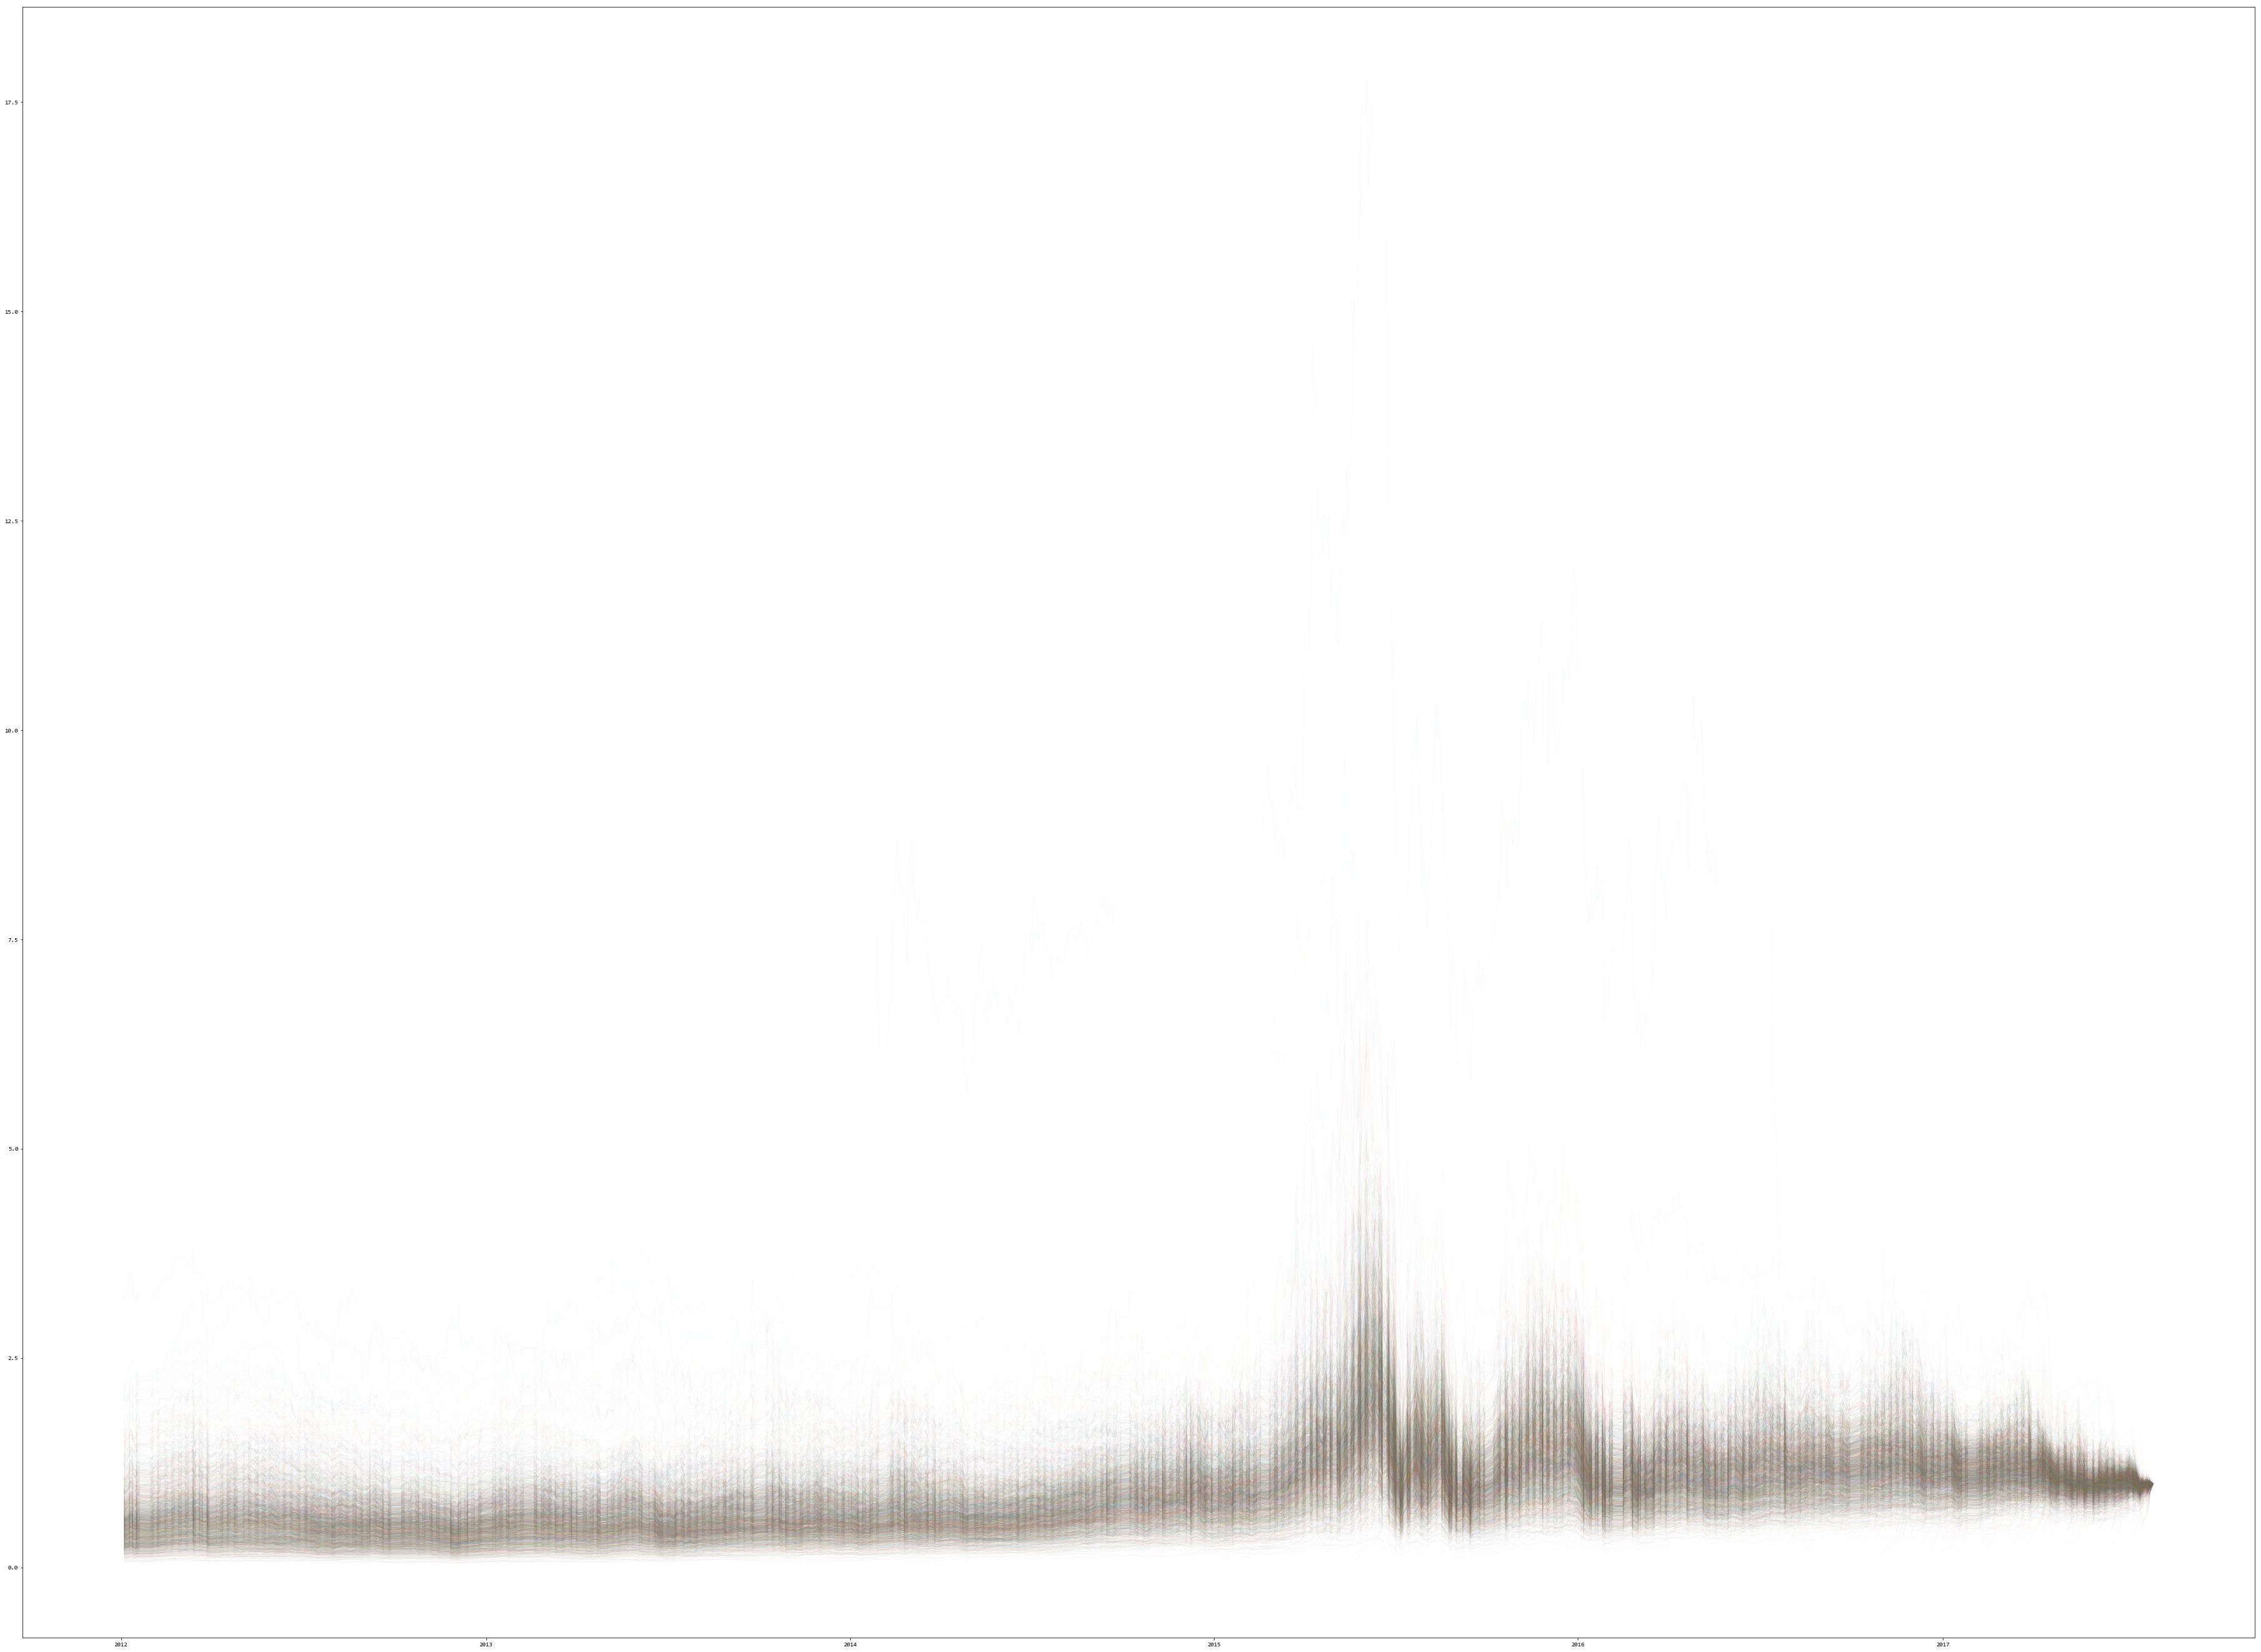

In [85]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[64,48])
ax = fig.gca()
for col in df_1.columns:
    ax.plot(df_1[col], lw=0.05, alpha=0.6)
plt.show()

# 将每一天的价格视为一个维度，这些股票通过PCA + t-SNE降维到3维

In [87]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

m_pca = PCA(n_components=50)
m_tsne = TSNE(n_components=3)
result = m_pca.fit_transform(df_1.fillna(-1).T)
result = m_tsne.fit_transform(result)

result = pd.DataFrame(result)
result['name'] = df_1.columns


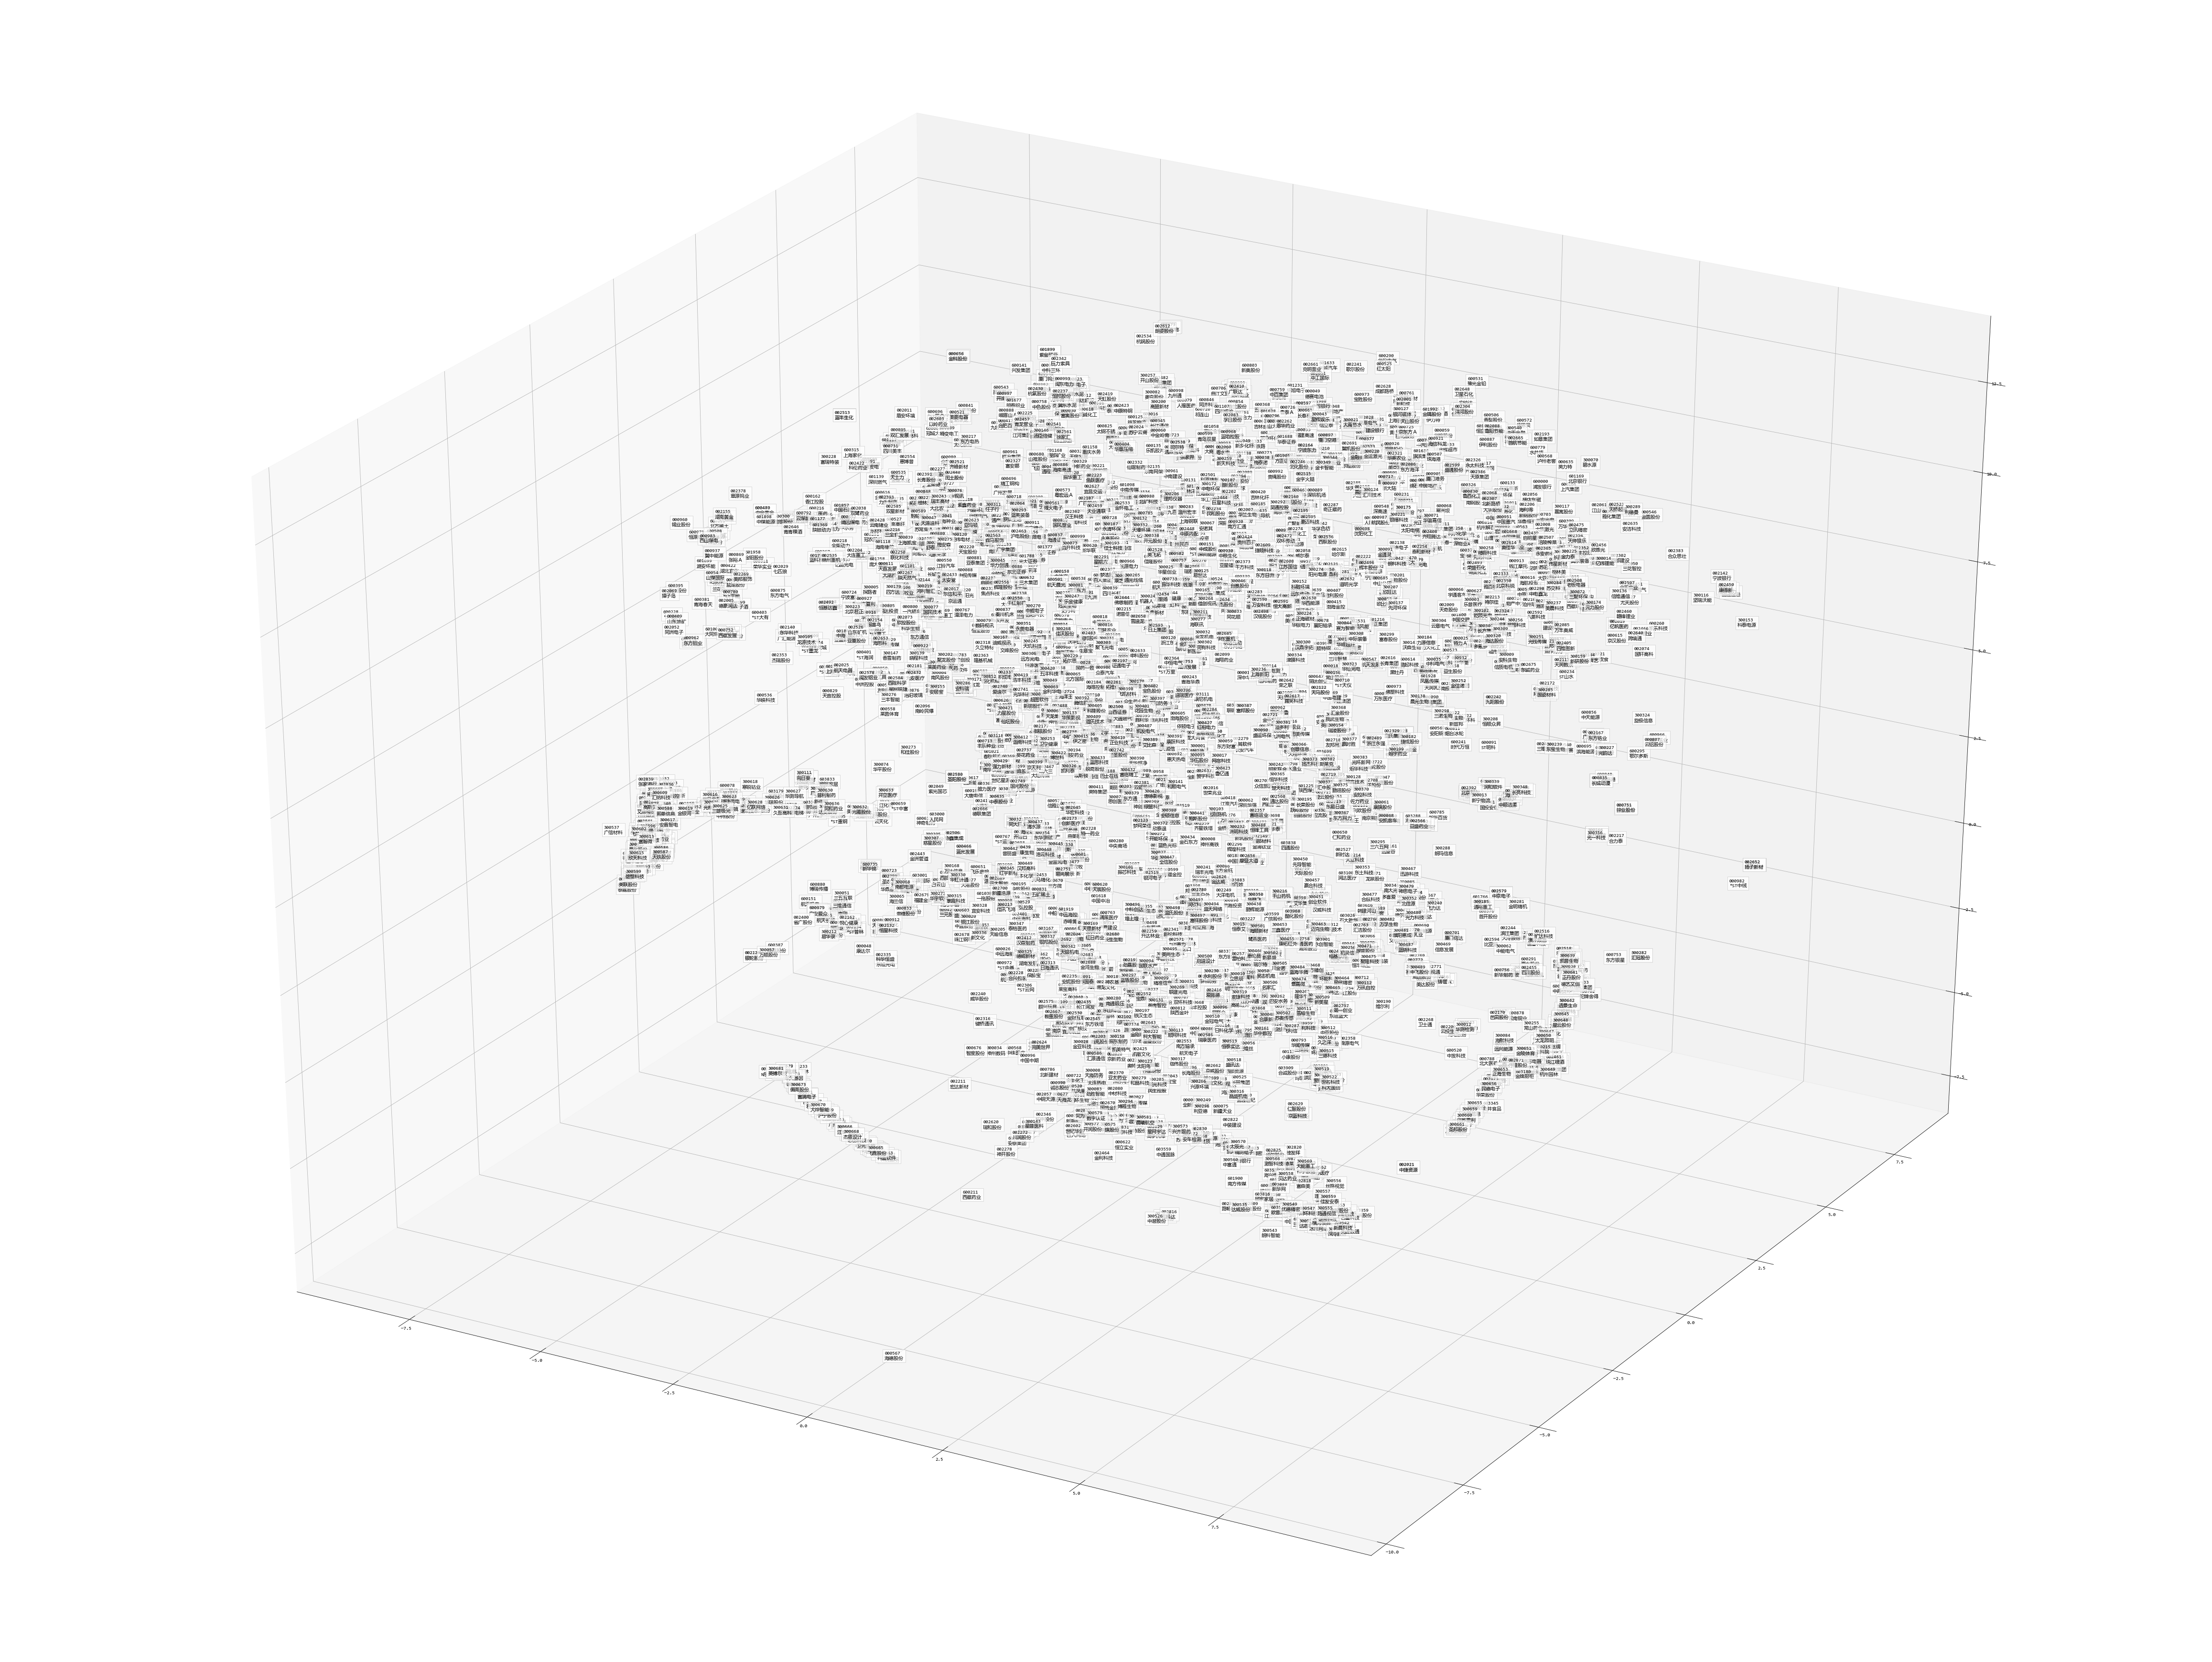

In [90]:
fig = plt.figure(figsize=[64,48])
ax = axes3d.Axes3D(fig)
#ax.text3D(result[0], result[1], result[2], result['name'])
pg = IntProgress(min=0, max=len(result), value=0)
display(pg)
for i in range(len(result)):
    f = str(result['name'][i])[0]
    if f=='6':
        bcolor = (1, 0.8, 0.8, 1)
        edgecolor = (0.8, 0.5, 0.5, 1)
    elif f=='3':
        bcolor = (0.8, 1, 0.8, 1)
        edgecolor = (0.5, 0.8, 0.5, 1)
    else:
        bcolor = 'white'
        edgecolor = (0.8, 0.8, 0.8, 1)
    bcolor='white'
    edgecolor = (0.8, 0.8, 0.8, 0.8)
    ax.text3D(result[0][i],result[1][i],result[2][i],result['name'][i],
             bbox=dict(facecolor=bcolor, edgecolor=edgecolor, alpha=0.7))
    if i>10000:
        break
    pg.value=i
    
ax.set_xlim(result[0].min(), result[0].max())
ax.set_ylim(result[1].min(), result[1].max())
ax.set_zlim(result[2].min(), result[2].max())
plt.show()